In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("crop_production.csv")

# Display first 5 rows
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [3]:
# Check dataset information
df.info()

# Check missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [19]:
north_states = ["Punjab", "Haryana", "Uttar Pradesh", 
                "Bihar", "Himachal Pradesh", "Uttarakhand"]

df_north = df[df["State_Name"].isin(north_states)]

df_north.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
27005,Bihar,ARARIA,1997,Autumn,Rice,17876.0,21397.0
27006,Bihar,ARARIA,1997,Kharif,Arhar/Tur,354.0,426.0
27007,Bihar,ARARIA,1997,Kharif,Dry ginger,78.0,110.0
27008,Bihar,ARARIA,1997,Kharif,Groundnut,8.0,10.0
27009,Bihar,ARARIA,1997,Kharif,Jute,39159.0,493403.0


In [20]:
df_crop = df_north[df_north["Crop"].isin(["Wheat", "Maize"])]

df_crop.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
27010,Bihar,ARARIA,1997,Kharif,Maize,3919.0,8691.0
27017,Bihar,ARARIA,1997,Rabi,Maize,3250.0,7543.0
27021,Bihar,ARARIA,1997,Rabi,Wheat,41719.0,70134.0
27022,Bihar,ARARIA,1997,Summer,Maize,6134.0,18485.0
27039,Bihar,ARARIA,1998,Kharif,Maize,5759.0,7097.0


In [21]:
df_crop = df_crop.dropna(subset=["Production"])
df_crop["Production"] = pd.to_numeric(df_crop["Production"], errors='coerce')

In [22]:
total_production = df_crop.groupby("Crop")["Production"].sum()
print(total_production)

Crop
Maize    7.163901e+07
Wheat    1.004263e+09
Name: Production, dtype: float64


In [23]:
average_production = df_crop.groupby("Crop")["Production"].mean()
print(average_production)

Crop
Maize     13596.320364
Wheat    340890.283435
Name: Production, dtype: float64


In [24]:
yearly_trend = df_crop.groupby(["Crop_Year","Crop"])["Production"].sum().unstack()

print(yearly_trend.head())

Crop           Maize       Wheat
Crop_Year                       
1997       3152581.0  46326777.0
1998       3218035.0  50577417.0
1999       3925054.0  55980252.0
2000       4208406.0  55798645.0
2001       4129040.0  56291818.0


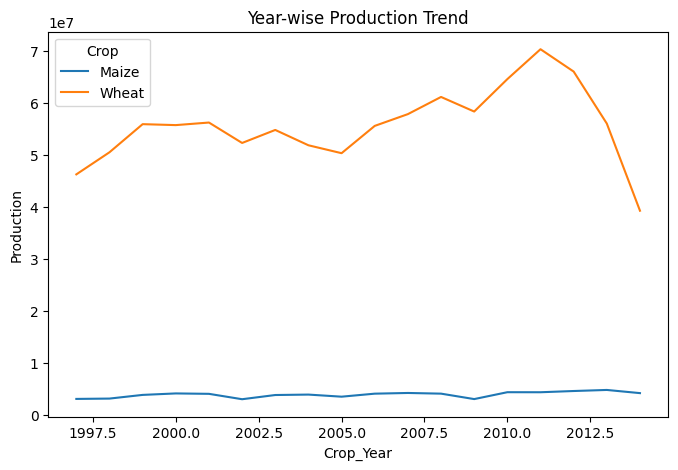

In [26]:
#Visualization using Line Chart
yearly_trend.plot(figsize=(8,5))
plt.title("Year-wise Production Trend")
plt.ylabel("Production")
plt.show()